Title: **Olympics**


Subtitle: Analysis of Kellogg's sponsorship


Gouthami Nadupuri

Objective:
The module is to depict the next olympic games that happens.
kellogg’s is one the main sponsors of the next olympic games.
Task is to make analysis on the right sport and athlete.

We have to first upload and read the csv file in Jupyter Notebook. Execute the uploaded csv file, it should display the entire data from the csv file. Execute to display first 10 rows using R programming. Calculate and execute number of rows and numbers of columns. Select a column and print the records with 10 largest values for that column. Select column that is relevant to kellog’s athlete decisions, consider medal or sport. Select and execute 5 columns that could help kellogg’s make informed sponsorship decisions. Create a plot that visually represents data. Example, create bar chart that shows the medals by sport.

In [ ]:
# Load necessary libraries
library(tidyverse)
library(ggplot2)
library(dplyr)
library(readr)

In [ ]:
# Load the dataset
data <- read_csv("/content/athlete_events.csv")

Rows: 271116 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): Name, Sex, Team, NOC, Games, Season, City, Sport, Event, Medal
dbl  (5): ID, Age, Height, Weight, Year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# View basic structure
glimpse(data)

Rows: 271,116
Columns: 15
$ ID     <dbl> 1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, …
$ Name   <chr> "A Dijiang", "A Lamusi", "Gunnar Nielsen Aaby", "Edgar Lindenau…
$ Sex    <chr> "M", "M", "M", "M", "F", "F", "F", "F", "F", "F", "M", "M", "M"…
$ Age    <dbl> 24, 23, 24, 34, 21, 21, 25, 25, 27, 27, 31, 31, 31, 31, 33, 33,…
$ Height <dbl> 180, 170, NA, NA, 185, 185, 185, 185, 185, 185, 188, 188, 188, …
$ Weight <dbl> 80, 60, NA, NA, 82, 82, 82, 82, 82, 82, 75, 75, 75, 75, 75, 75,…
$ Team   <chr> "China", "China", "Denmark", "Denmark/Sweden", "Netherlands", "…
$ NOC    <chr> "CHN", "CHN", "DEN", "DEN", "NED", "NED", "NED", "NED", "NED", …
$ Games  <chr> "1992 Summer", "2012 Summer", "1920 Summer", "1900 Summer", "19…
$ Year   <dbl> 1992, 2012, 1920, 1900, 1988, 1988, 1992, 1992, 1994, 1994, 199…
$ Season <chr> "Summer", "Summer", "Summer", "Summer", "Winter", "Winter", "Wi…
$ City   <chr> "Barcelona", "London", "Antwerpen", "Paris", "Calgary", "Calgar…
$ Sport  <chr>

In [ ]:
# Clean the data: Remove rows with missing Medal info for medal-related analysis
medal_data <- data %>%
  filter(!is.na(Medal))

In [ ]:
# 1. Top 10 Countries with Most Medals
top_countries <- medal_data %>%
  group_by(Team) %>%
  summarise(Total_Medals = n()) %>%
  arrange(desc(Total_Medals)) %>%
  slice(1:10)

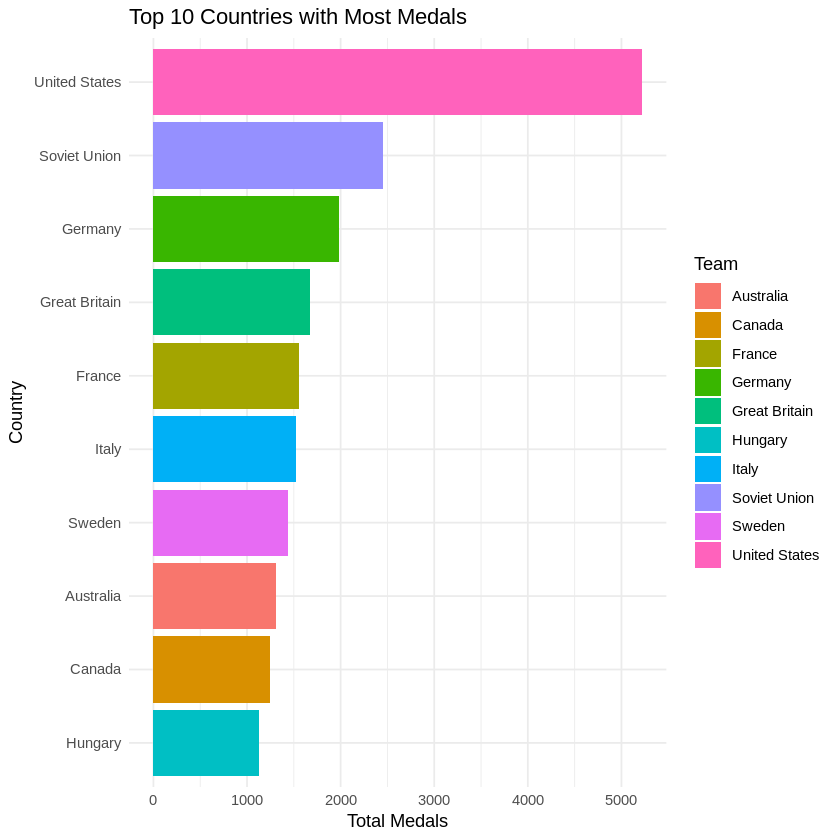

In [ ]:
# Plot Top 10 Countries
ggplot(top_countries, aes(x = reorder(Team, Total_Medals), y = Total_Medals, fill = Team)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Top 10 Countries with Most Medals",
       x = "Country",
       y = "Total Medals") +
  theme_minimal()

In [ ]:
# 2. Gender Participation Over the Years
gender_participation <- data %>%
  group_by(Year, Sex) %>%
  summarise(Athletes = n()) %>%
  ungroup()

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


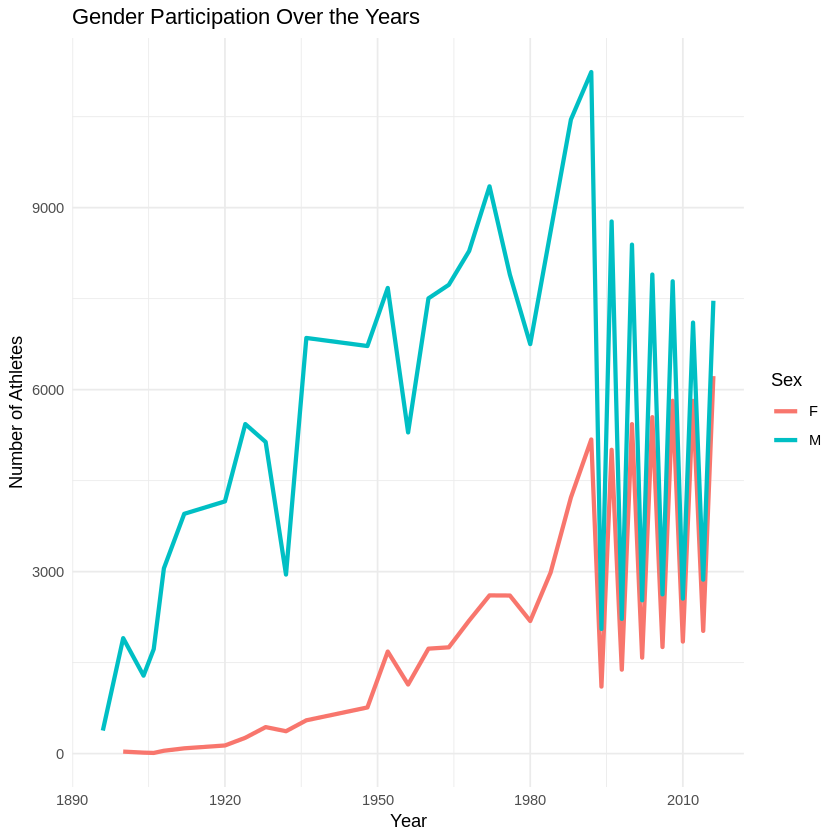

In [ ]:
# Plot Gender Participation Trend
ggplot(gender_participation, aes(x = Year, y = Athletes, color = Sex)) +
  geom_line(size = 1.2) +
  labs(title = "Gender Participation Over the Years",
       x = "Year",
       y = "Number of Athletes") +
  theme_minimal()

Warning message:
“Removed 9474 rows containing non-finite outside the scale range (`stat_bin()`).”


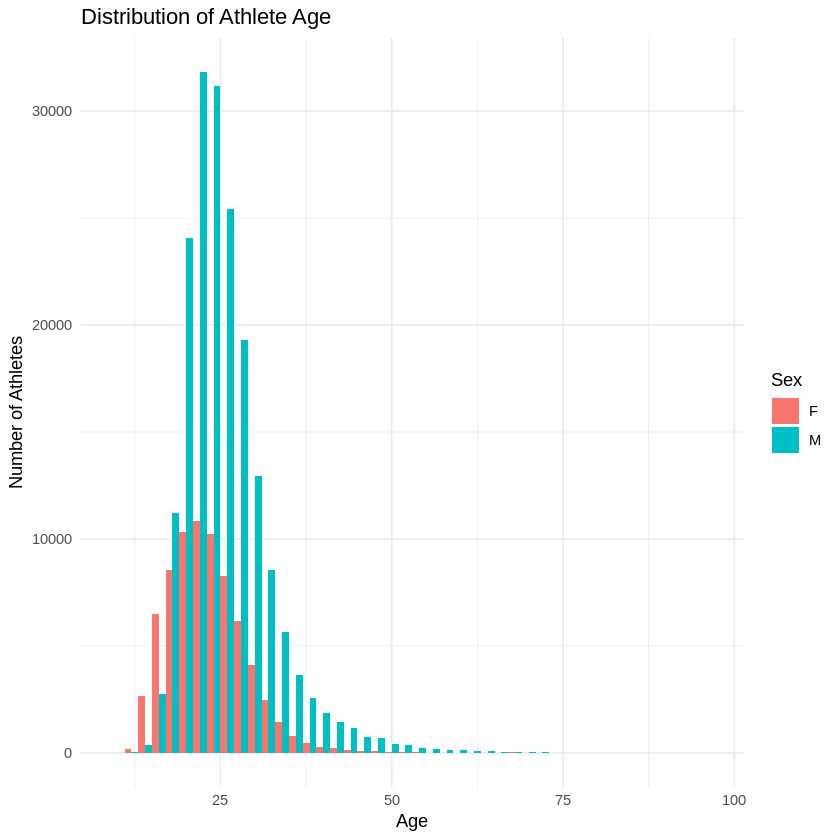

In [ ]:
# 3. Distribution of Athlete Age
ggplot(data, aes(x = Age, fill = Sex)) +
  geom_histogram(binwidth = 2, position = "dodge") +
  labs(title = "Distribution of Athlete Age",
       x = "Age",
       y = "Number of Athletes") +
  theme_minimal()

In [ ]:
# 4. Most Popular Sports (By Number of Athletes)
popular_sports <- data %>%
  group_by(Sport) %>%
  summarise(Athletes = n()) %>%
  arrange(desc(Athletes)) %>%
  slice(1:10)

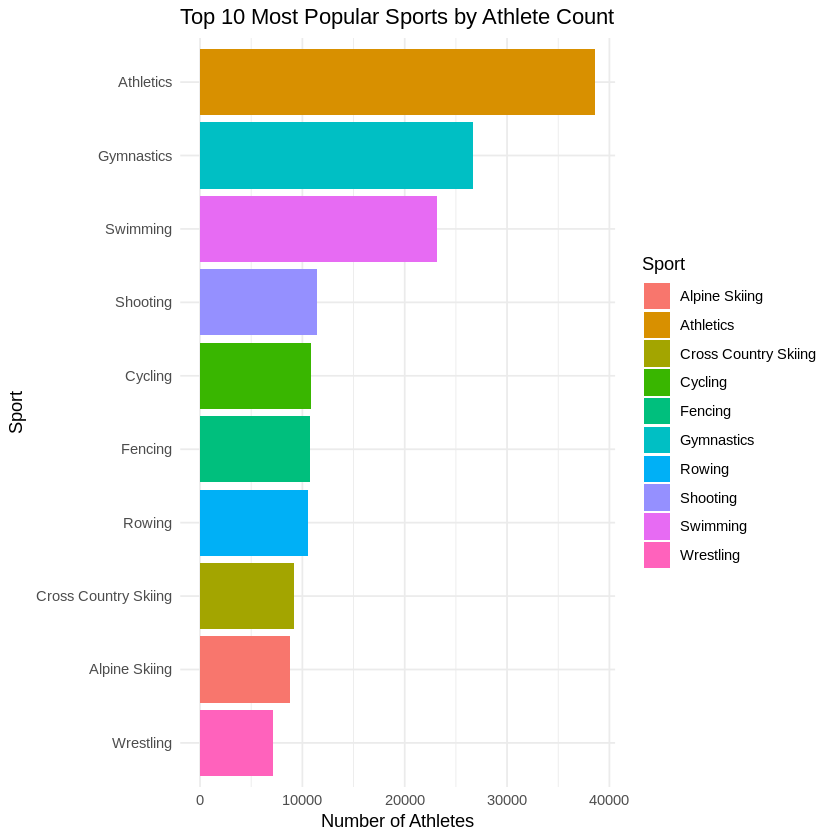

In [ ]:
# Plot Top 10 Popular Sports
ggplot(popular_sports, aes(x = reorder(Sport, Athletes), y = Athletes, fill = Sport)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Top 10 Most Popular Sports by Athlete Count",
       x = "Sport",
       y = "Number of Athletes") +
  theme_minimal()

In [ ]:
# 5. Medal Distribution by Sport
medal_by_sport <- medal_data %>%
  group_by(Sport, Medal) %>%
  summarise(Count = n()) %>%
  arrange(desc(Count))

`summarise()` has grouped output by 'Sport'. You can override using the
`.groups` argument.


In [ ]:
# Top 5 Sports Medal Breakdown
top5_sports <- medal_by_sport %>%
  group_by(Sport) %>%
  summarise(Total = sum(Count)) %>%
  arrange(desc(Total)) %>%
  slice(1:5)

In [ ]:
top5_sports_list <- top5_sports$Sport

In [ ]:
filtered_medal_data <- medal_by_sport %>%
  filter(Sport %in% top5_sports_list)

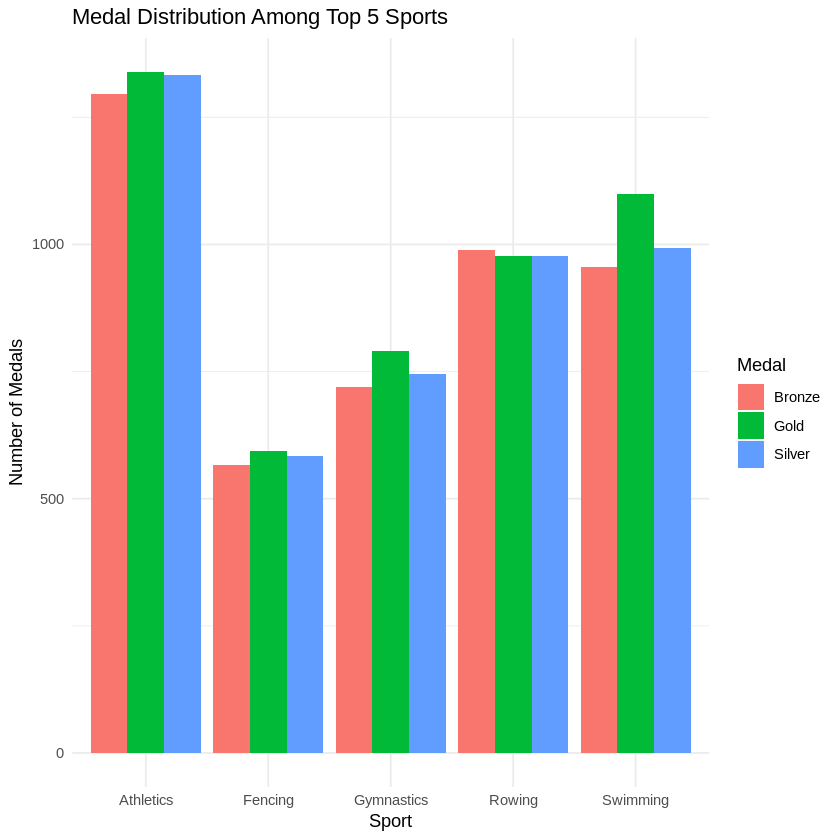

In [ ]:
# Plot
ggplot(filtered_medal_data, aes(x = Sport, y = Count, fill = Medal)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Medal Distribution Among Top 5 Sports",
       x = "Sport",
       y = "Number of Medals") +
  theme_minimal()

In [ ]:
selected_column <- athlete$Sport
top_10_values <- head(selected_column, 10)
print(top_10_values)

 [1] "Basketball"    "Judo"          "Football"      "Tug-Of-War"   
 [5] "Speed Skating" "Speed Skating" "Speed Skating" "Speed Skating"
 [9] "Speed Skating" "Speed Skating"


In [ ]:
top_sport <- sort(table(medal$Sport))
sports <- tail(top_sport)
sports
names_sports <- names(sports)
names_sports


  Football    Fencing Gymnastics     Rowing   Swimming  Athletics 
      1571       1743       2256       2945       3048       3969 

[1] "Football"   "Fencing"    "Gymnastics" "Rowing"     "Swimming"  
[6] "Athletics"

#Summary of the findings: explain in words what you have found in the dataset.
Research is about the analysis of olympics data and to provide its insights that will assist Kellogg's in selecting the suitable sport and athlete.
As discussed, imported the csv file which has the data set. Executed the file to display the complete data. Considered the head data. Executed to display number of rows, number of columns and also, the percentile of numericals.Then select the column and print to extract or display the values from the selected column.
Creating a plot to visulaize the information.


**Recommmedation:**

Kelloggs' analysis has let to the result of achieving the name of desired athlete who has won the highest number of gold medals. Players Michael Fred Phelps, II is the player found in our analysis to get the sponsorship from kellogg's